In [3]:
import nbimporter
import Functions as fun
import os
import numpy as np
import Mors as mors
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.integrate as integrate
import pandas as pd

In [38]:
#test array of stars
ages = np.linspace(50,5000,10000) #age array
#empty array of loaded stars
stars = []
for i,star in enumerate(os.listdir('rp75')):
    file_path = os.path.join('rp75', star)
    stars.append(mors.Load(file_path))

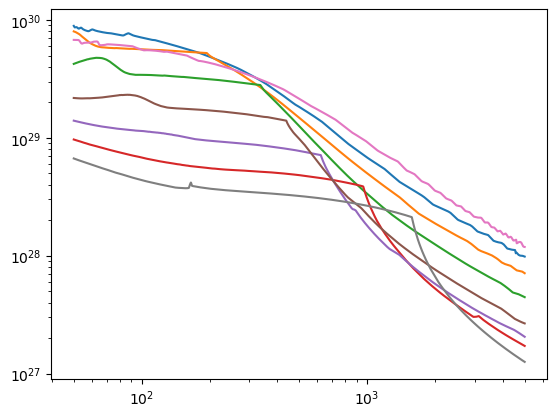

In [5]:
#test LxTrack()
for track in fun.LxTrack(ages,stars).values():
    plt.plot(ages,track)
    plt.xscale('log')
    plt.yscale('log')

#WORKING

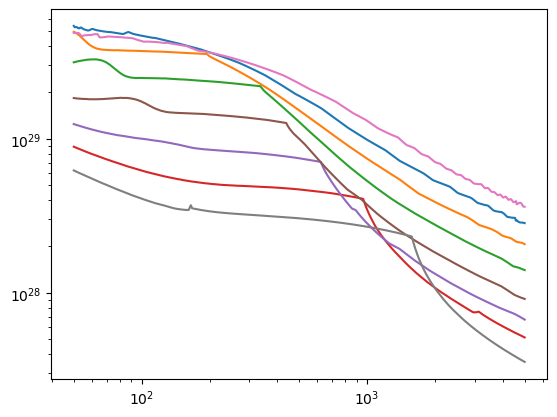

In [7]:
#test LeuvTrack():
for track in fun.LeuvTrack(ages,stars).values():
    plt.plot(ages,track)
    plt.xscale('log')
    plt.yscale('log')

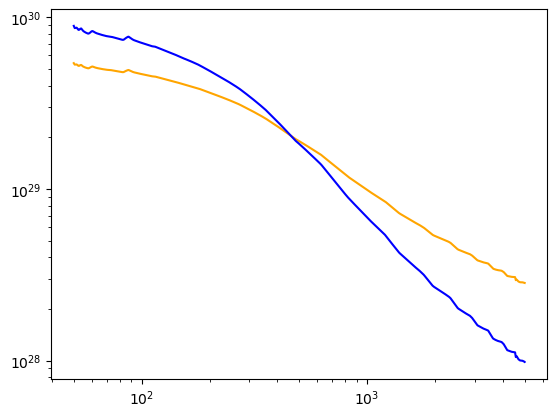

In [10]:
#Comparing Leuv and Lx tracks
track = list(fun.LeuvTrack(ages,stars).values())[0]
plt.plot(ages,track,color='orange')
plt.xscale('log')
plt.yscale('log')

track2 = list(fun.LxTrack(ages,stars).values())[0]
plt.plot(ages,track2,color='blue')


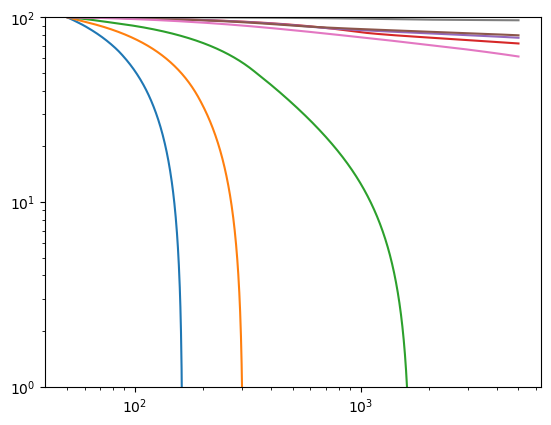

In [13]:
#test massLossRate
data = pd.read_csv('RefinedCHZ_data.csv')
chz = data['CHZ']
mlr = fun.massLossRate(0.1,ages,0.5,1,stars,chz)
for array in mlr:
    plt.plot(ages[1:],array)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1,100)
#WORKING

In [27]:
list(fun.LxTrack(ages,stars).values());

In [51]:
def plotByMass(ages, stars, plotLxAndLeuv=True, plotMassRem=True, plotLxTrack=False, plotLeuvTrack=False, sepByMass=False):
    '''
    ages: 1D array of ages in Myr
    stars: 1D array of Mors stars objects
    LxAndLeuv: plot the Lx+Leuv tracks for each mass
    MassRem: plot the %mass remaining over time for each mass
    LxTrack: plot just the Lx tracks for each mass
    LeuvTrack: plot just the Leuv tracks for each mass
    sepByMass: make one plot for each mass

    By default
    '''
    #check that the stars are all of the same percentile
    for i,star in enumerate(stars):
        if star[0].percentile != star[i].percentile:
            return "Stars must be of the same rotation speed percentile"
    
    #make np array of the values of the LxTrack and LeuvTrack dictionaries
    LxTracks = np.array(list(fun.LxTrack(ages,stars).values()))
    LeuvTracks = np.array(list(fun.LeuvTrack(ages,stars).values()))
    
    
    #plots the lx + leuv tracks for each mass
    if plotLxAndLeuv:
        for i,(lxtrack,leuvtrack) in enumerate(zip(LxTracks,LeuvTracks)):
            plt.plot(ages,lxtrack+leuvtrack,label='Mass='+str(stars[i].Mstar))
            plt.xscale('log')
            plt.yscale('log')
            if not sepByMass:
                plt.title('Lx+Leuv tracks for percentile='+str())
                plt.legend()
            if sepByMass:
                plt.title('Lx+Leuv m='+str(stars[i].Mstar))
                plt.figure()
    if plotMassRem:
        
        

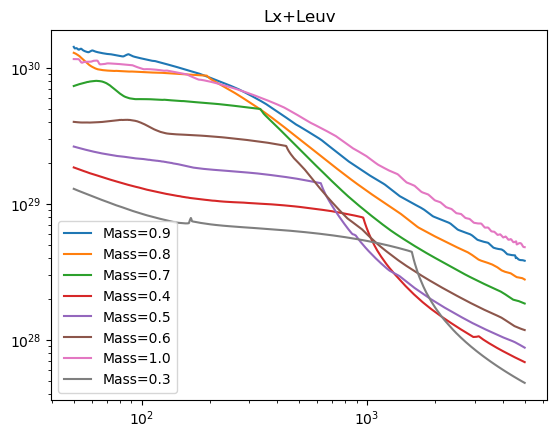

In [52]:
#testing plotByMass
plotByMass(ages,stars)